O arquivo src.py contém o código referente a análise exploratória e construção de conglomerados e deve ser o primeiro na execução.

In [37]:
#importando bibliotecas
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
import pandas_profiling
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
import os
import seaborn as sns
plt.rc("font", size=14)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['axes.titlepad'] = 20 
#rcParams['axes.facecolor']='#E6E6E6'
#rcParams['grid.color']='w'
sns.set()

In [38]:
try:
    os.makedirs("img/")
except FileExistsError:
    pass

try:
    os.makedirs("reports/")
except FileExistsError:
    pass

try:
    os.makedirs("data/")
except FileExistsError:
    pass

In [39]:
#Variavel dependente
label_cols=['declined']

#Variaveis independentes
quatitative_cols=['valueClient', 'extraCost', 'valueResources', 'net',
       'daysOnContact', 'daysOnInterview', 'daysOnSendCV',
       'daysOnReturn', 'daysOnCSchedule', 'daysOnCRealized', 'processDuration']

In [40]:
#Metodo para calcular medidas estatisticas
def describe(df):
    df=df[quatitative_cols]
    mode= (df.mode()[quatitative_cols])
    mode_series= mode.iloc[0]
    mode_series_t= mode_series.to_frame().T
    mode_series_t=mode_series_t.rename(index={0: "Moda"})
    result= pd.concat([df.describe(), mode_series_t, (pd.DataFrame(df.var() , columns = ["Variancia"] ).T)]).T
    return result

In [41]:
# Metodo para investigacao de caracteristicas correlacionadas
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method ='pearson') 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
#formatação de decimais
pd.options.display.float_format = '{:,.2f}'.format

In [43]:
#lendo a base de dados
print("Lendo os dados da base...")
df = pd.read_csv('data/closures.csv', sep=',')

Lendo os dados da base...


Desenhando os graficos de frequência de amostras em cada classe da variável dependente...



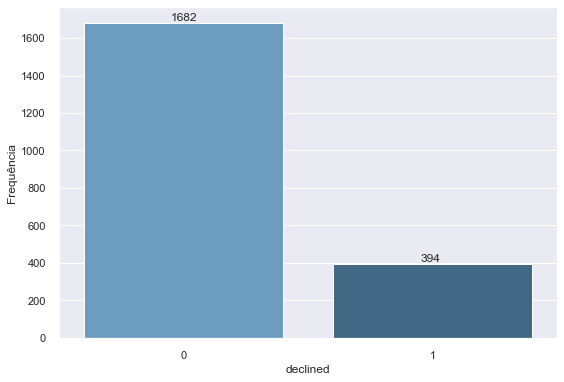

In [44]:
print("Desenhando os graficos de frequência de amostras em cada classe da variável dependente...")
print()
#Frequencia de amostras em cada classe
ax = sns.countplot(x="declined", data=df, palette="Blues_d")
plt.subplots_adjust(bottom=0.4)
plt.ylabel('Frequência')
#Imprimindo as frequencias no grafico
total = len(df['declined'])
for p in ax.patches:
       ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+10))           

In [45]:
plt.savefig('img/FrequenciaClasses.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

In [46]:
print("Calculando as medidas estatísticas para as variaveis quantitativas independentes...")
print()
#Medidas estatisticas
describe(df).to_excel('reports/Estatisticas.xlsx', sheet_name=('Medidas'))

Calculando as medidas estatísticas para as variaveis quantitativas independentes...



In [47]:
print("Removendo dados incorretos...")
print()
#Removendo dados incorretos
df =  df.loc[(df['processDuration']>=0)]

Removendo dados incorretos...



Desenhando os graficos de frequência de amostras em cada classe depois de remover dados incorretos...



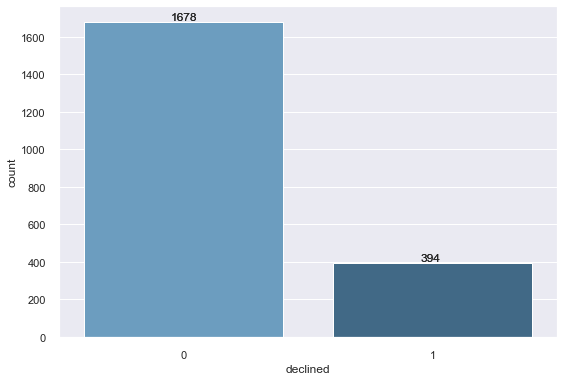

In [48]:
print("Desenhando os graficos de frequência de amostras em cada classe depois de remover dados incorretos...")
print()
#Frequencia de amostras em cada classe depois de remover dados incorretos
ax = sns.countplot(x="declined", data=df, palette="Blues_d")
plt.subplots_adjust(bottom=0.4)
ax = sns.countplot(x="declined", data=df, palette="Blues_d")
plt.subplots_adjust(bottom=0.4)
#Imprimindo as frequencias no grafico
total = len(df['declined'])
for p in ax.patches:
       ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

In [49]:
plt.ylabel('Frequência')
plt.savefig('img/FrequenciaClassesDepoisRemocao.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

In [50]:
print("Criando data frames auxiliares...")
print()
# Data Frames auxiliares para armazenar os resultados
quantitative_data_z=DataFrame(df, columns=quatitative_cols)
result_score=df.copy()

Criando data frames auxiliares...



In [51]:
print("Construindo histogramas...")
print()
#Investigacao empirica do numero bins para os histogramas
for i in range (5, 26):
    print("Construindo histograma com bins="+str(i))
    print()
    #Histogramas antes do ZScore
    histograms = quantitative_data_z.hist(figsize=(10,10), bins=i)
    # Thus we have to give more margin:
    plt.subplots_adjust(bottom=0.4)
    plt.xticks(rotation=90)
    plt.savefig('img/histogramasAllVars'+ str(i)+'.png', dpi=300)
    plt.clf()
    plt.cla()
    plt.close()

Construindo histogramas...

Construindo histograma com bins=5

Construindo histograma com bins=6

Construindo histograma com bins=7

Construindo histograma com bins=8

Construindo histograma com bins=9

Construindo histograma com bins=10

Construindo histograma com bins=11

Construindo histograma com bins=12

Construindo histograma com bins=13

Construindo histograma com bins=14

Construindo histograma com bins=15

Construindo histograma com bins=16

Construindo histograma com bins=17

Construindo histograma com bins=18

Construindo histograma com bins=19

Construindo histograma com bins=20

Construindo histograma com bins=21

Construindo histograma com bins=22

Construindo histograma com bins=23

Construindo histograma com bins=24

Construindo histograma com bins=25



In [52]:
print("Construindo os gráficos boxplot das variáveis financeiras...")
print()
#Medida de dispersao antes do ZScore
boxplot = quantitative_data_z.boxplot(column=['valueClient', 'extraCost', 'valueResources', 'net'], figsize=(10,10), fontsize = 14)
plt.xticks(rotation=90)
plt.savefig('img/boxplotsFinancial.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Construindo os gráficos boxplot das variáveis financeiras...



In [53]:
print("Construindo os gráficos boxplot das variáveis temporais...")
print()
boxplot = quantitative_data_z.boxplot(column=['daysOnContact', 'daysOnInterview', 'daysOnSendCV',
       'daysOnReturn', 'daysOnCSchedule', 'daysOnCRealized',  'processDuration'], figsize=(10,10), fontsize = 14)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4, top=1.0)
plt.savefig('img/boxplotsTemporal.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Construindo os gráficos boxplot das variáveis temporais...



In [23]:
print("Normalizando os dados com ZScore...")
print()
#Aplicando Z-Score para normalizar os valores das variaveis quantitativas
for i in quatitative_cols: 
    quantitative_data_z[i] = stats.zscore(quantitative_data_z[i]).astype(float)
    result_score[i] = stats.zscore(result_score[i]).astype(float)

Normalizando os dados com ZScore...



In [24]:
print("Calculando medidas estatísticas depois do Z-Score...")
print()
#Medidas estatisticas com ZScore
describe(quantitative_data_z).to_excel('reports/EstatisticasZScore.xlsx', sheet_name=('Medidas'))

Calculando medidas estatísticas depois do Z-Score...



In [25]:
print("Construindo histogramas das variaveis quantitativas depois do Z-Score...")
print()
#Investigacao empirica do numero bins para os histogramas
for i in range (5, 26):
    print("Construindo histograma com bins="+str(i))
    print()
    #Histogramas antes do ZScore
    histograms = quantitative_data_z.hist(figsize=(10,10), bins=i)
    # Thus we have to give more margin:
    plt.subplots_adjust(bottom=0.4)
    plt.xticks(rotation=90)
    plt.savefig('img/histogramasAllVarsZScore'+ str(i)+'.png', dpi=300)
    plt.clf()
    plt.cla()
    plt.close()

Construindo histogramas das variaveis quantitativas depois do Z-Score...

Construindo histograma com bins=5

Construindo histograma com bins=6

Construindo histograma com bins=7

Construindo histograma com bins=8

Construindo histograma com bins=9

Construindo histograma com bins=10

Construindo histograma com bins=11

Construindo histograma com bins=12

Construindo histograma com bins=13

Construindo histograma com bins=14

Construindo histograma com bins=15

Construindo histograma com bins=16

Construindo histograma com bins=17

Construindo histograma com bins=18

Construindo histograma com bins=19

Construindo histograma com bins=20

Construindo histograma com bins=21

Construindo histograma com bins=22

Construindo histograma com bins=23

Construindo histograma com bins=24

Construindo histograma com bins=25



In [26]:
print("Construindo os gráficos boxplot das variáveis financeiras depois do Z-Score...")
print()
#Medidas de dispersao apos a normalizacao
boxplot = result_score.boxplot(column=['valueClient', 'extraCost', 'valueResources', 'net'], figsize=(10,10), fontsize = 14)
plt.xticks(rotation=90)
plt.savefig('img/boxplotsFinancial_zscore.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Construindo os gráficos boxplot das variáveis financeiras depois do Z-Score...



In [27]:
print("Construindo os gráficos boxplot das variáveis temporais depois do Z-Score...")
print()
boxplot = result_score.boxplot(column=['daysOnContact', 'daysOnInterview', 'daysOnSendCV',
       'daysOnReturn', 'daysOnCSchedule', 'daysOnCRealized', 'processDuration'], figsize=(10,10), fontsize = 14)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4, top=1.0)
plt.savefig('img/boxplotsTemporal_zscore.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Construindo os gráficos boxplot das variáveis temporais depois do Z-Score...



In [28]:
print("Investigando a correlação entre as variáveis independentes...")
print()
#Verificando se alguma variável independente tem correlação
corr_features = correlation(quantitative_data_z, 0.8)
print("Variaveis correlacionadas: ")
print(corr_features)
print()
print('Número de variáveis correlacionadas: ', len(set(corr_features)))
print()

Investigando a correlação entre as variáveis independentes...

Variaveis correlacionadas: 
set()

Número de variáveis correlacionadas:  0



In [29]:
print("Desenhando a matriz de correlação entre as variáveis independentes...")
print()
# Matriz de correlação
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(quantitative_data_z.corr(), cmap="Blues")
ax.set_title('')
plt.savefig('img/Correlation Matrix.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Desenhando a matriz de correlação entre as variáveis independentes...



In [30]:
print("Investigando o número de conglomerados...")
print()
#Investigando o numero de Clusters
distortions = []
for i in range(1, 50):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(quantitative_data_z)
    distortions.append(km.inertia_)

Investigando o número de conglomerados...



In [31]:
print("Desenhando o gráfico com os resultados do método Elbow...")
print()
# Contruindo grafico do com metodo Elbow
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Quantidade de Conglomerados')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.savefig('img/inertia_kmeans.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Desenhando o gráfico com os resultados do método Elbow...



In [32]:
print("Analisando o número de conglomerados usando o coeficiente de Silhouette...")
print()
silhouette = []
for n_clusters in range(2,50):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(quantitative_data_z)
    silhouette_avg = silhouette_score(quantitative_data_z, cluster_labels,  metric='euclidean')
    silhouette.append(silhouette_avg)
    #print("Para o número cluster={}, O coeficiente de Silhouette é {}".format(n_clusters, silhouette_avg))

Analisando o número de conglomerados usando o coeficiente de Silhouette...



In [33]:
print("Verificando o número de conglomerados em acordo com o valor máximo do coeficiente de Silhouette...")
print()
# Verificando o número de clusters em acordo com o valor máximo do coeficiente
x = np.array(silhouette, dtype=np.float64)
n_clusters_silhouette=np.argmax(x)+2
print("O número de clusters deve ser igual a {}. Para esse número, coeficiente de Silhouette é {}".format(n_clusters_silhouette, np.nanmax(x)))
print()
plt.plot(range(2, 50), silhouette, marker='o')
plt.xticks(np.arange(2, 50, 2.0))
plt.xlabel('Quantidade de Conglomerados')
plt.ylabel('Coeficiente de Silhouette')
plt.savefig('img/Silhouette_kmeans.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Verificando o número de conglomerados em acordo com o valor máximo do coeficiente de Silhouette...

O número de clusters deve ser igual a 2. Para esse número, coeficiente de Silhouette é 0.5203423242727814



In [34]:
print("Adicionando o conglomerado que a amostra pertence em acordo com o K-means...")
print()
#Adicionando o conglomerado que a amostra pertence em acordo com o K-means
kmeans = KMeans(n_clusters=n_clusters_silhouette, random_state=0,  max_iter=600, algorithm = 'auto')
kmeans.fit(quantitative_data_z)
predict = kmeans.predict(quantitative_data_z)
result_score["cluster"] = predict
result_score.to_csv('data/kmeans_result_zscore.csv')
df["cluster"] = predict
df.to_csv('data/kmeans_result.csv')

Adicionando o conglomerado que a amostra pertence em acordo com o K-means...



C:\ProgramData\Miniconda3\envs\cashme\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [35]:
print("Desenhando o gráfico de frequência das amostras que pertencem a cada conglomerado...")
print()
#Frequencia de amostras em cada conglomerado
ax = sns.countplot(x="cluster", data=df, palette="Blues_d")
plt.subplots_adjust(bottom=0.4)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+2))
plt.ylabel('Frequência')
plt.xlabel('Conglomerado')
plt.savefig('img/FrequenciasPorCluster.png', dpi=300)
plt.clf()
plt.cla()
plt.close()

Desenhando o gráfico de frequência das amostras que pertencem a cada conglomerado...



In [36]:
print("Iniciando a análise de dados de cada conglomerado...")
print()
#Analise dos dados por conglomerado
for i in range (0, n_clusters_silhouette):
    cluster=df[df["cluster"]==i]
    cluster_zscore=result_score[result_score["cluster"]==i]
    print("Calculando as medidas estatísticas para o conglomerado "+ str(i))
    print()
    describe(cluster[quatitative_cols]).to_excel('reports/EstatisticasClusters'+str(i)+'.xlsx', sheet_name=('Cluster'+str(i)))
    describe(cluster_zscore[quatitative_cols]).to_excel('reports/EstatisticasZScoreClusters'+str(i)+'.xlsx', sheet_name=('Cluster'+str(i)))
    
    print("Desenhando os graficos de frequência de amostras em cada classe para o conglomerado "+ str(i))
    print()
    #Frequencia de amostras em cada classe cluster
    ax = sns.countplot(x="declined", data=cluster, palette="Blues_d")
    plt.subplots_adjust(bottom=0.4)
    #Imprimindo as frequencias
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+10))
    plt.ylabel('Frequência')
    plt.savefig('img/FrequenciasCluster'+ str(i)+'.png', dpi=300)
    plt.clf()
    plt.cla()
    plt.close()

    print("Desenhando os graficos do tipo histograma para o conglomerado "+ str(i))
    print()
    #Histogramas cluster
    for j in range (5, 26):
        print("Construindo histograma com bins="+str(j)+ " para o conglomerado "+ str(i))
        print()
        histograms = cluster[quatitative_cols].hist(figsize=(10,10), bins=j)
        plt.subplots_adjust(bottom=0.4)
        plt.subplots_adjust(top=1)
        #plt.xticks(rotation=90)
        plt.xlabel('Conglomerado')
        plt.savefig('img/histogramasAllVarsCluster'+ str(i)+'.png', dpi=300)
        plt.clf()
        plt.cla()
        plt.close()

    print("Construindo os gráficos boxplot das variáveis financeiras para o conglomerado "+ str(i))
    print()
    #Investiganting outliers by cluster
    boxplot = cluster[quatitative_cols].boxplot(column=['valueClient', 'extraCost', 'valueResources', 'net'], figsize=(10,10), fontsize = 14)
    plt.xticks(rotation=90)
    plt.savefig('img/boxplotsFinancialCluster'+ str(i)+'.png', dpi=300)
    plt.clf()
    plt.cla()
    plt.close()

    print("Construindo os gráficos boxplot das variáveis temporais para o conglomerado "+ str(i))
    print()
    boxplot = cluster[quatitative_cols].boxplot(column=['daysOnContact', 'daysOnInterview', 'daysOnSendCV',
        'daysOnReturn', 'daysOnCSchedule', 'daysOnCRealized', 'processDuration'], figsize=(10,10), fontsize = 14)
    plt.xticks(rotation=90)
    # Thus we have to give more margin:
    plt.subplots_adjust(bottom=0.4, top=1.0)
    plt.savefig('img/boxplotsTemporalCluster'+ str(i)+'.png', dpi=300)
    plt.clf()
    plt.cla()
    plt.close()

    print("Construindo a matriz de correlação entre as variáveis independentes para o conglomerado "+ str(i))
    print()
    # Correlation matrix between features 
    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(cluster[quatitative_cols].corr(), cmap="Blues")
    ax.set_title('')
    plt.savefig('img/Correlation Matrix Cluster'+ str(i)+'.png', dpi=300)
    plt.clf()
    plt.cla()
    plt.close()

print("Finalizando a etapa de pré processamento.")
print()

Iniciando a análise de dados de cada conglomerado...

Calculando as medidas estatísticas para o conglomerado 0

Desenhando os graficos de frequência de amostras em cada classe para o conglomerado 0

Desenhando os graficos do tipo histograma para o conglomerado 0

Construindo histograma com bins=5 para o conglomerado 0

Construindo histograma com bins=6 para o conglomerado 0

Construindo histograma com bins=7 para o conglomerado 0

Construindo histograma com bins=8 para o conglomerado 0

Construindo histograma com bins=9 para o conglomerado 0

Construindo histograma com bins=10 para o conglomerado 0

Construindo histograma com bins=11 para o conglomerado 0

Construindo histograma com bins=12 para o conglomerado 0

Construindo histograma com bins=13 para o conglomerado 0

Construindo histograma com bins=14 para o conglomerado 0

Construindo histograma com bins=15 para o conglomerado 0

Construindo histograma com bins=16 para o conglomerado 0

Construindo histograma com bins=17 para o con